# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

### **Juan Camilo Florez 201620135**
### **Fernando Perez 200222809**
### **Jhon Florez 201920529**
### **Angie Paola Chacón 201012536**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [ ]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [ ]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

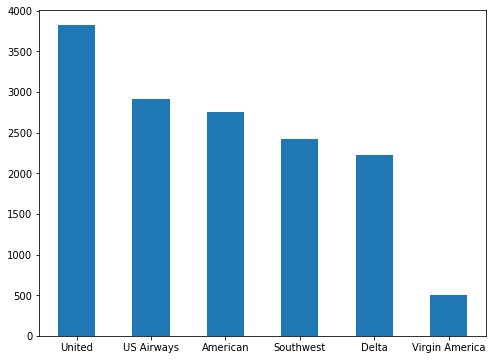

In [ ]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

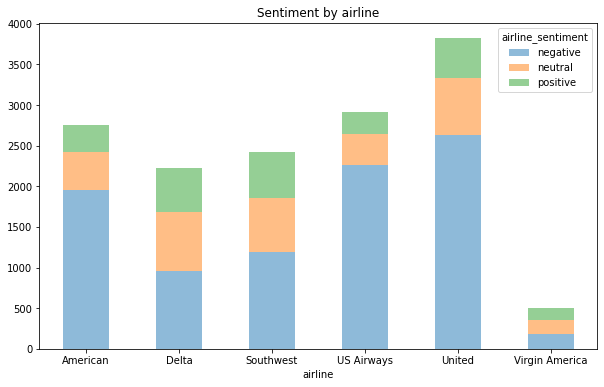

In [ ]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})


**crear matrices sparse con los tokens con la función countvectorizer**

In [ ]:
vect = CountVectorizer(lowercase=True)
X_dtm = vect.fit_transform(X)

In [ ]:
df=X_dtm.todense()
df
print(df.shape)

(14640, 15051)


Con la función de vectorizer se crea una matriz sparse con 15051 columnas (palabras). En este caso no se ha hecho ningún tipo de limpieza al texto

**lista de tokens**

In [ ]:
print(vect.get_feature_names())

['00', '000', '000114', '000419', '000ft', '000lbs', '0011', '0016', '00a', '00am', '00p', '00pm', '01', '0162389030167', '0162424965446', '0162431184663', '0167560070877', '0185', '01ldxn3qqq', '01pm', '02', '0200', '03', '0316', '0372389047497', '04', '0400', '04sdytt7zd', '05', '0510', '0530', '05am', '05pm', '06', '0600', '0638', '0671', '07', '0736', '0769', '07p', '07xhcacjax', '08', '0985', '0_0', '0bjnz4eix5', '0cevy3p42b', '0ewj7oklji', '0hmmqczkcf', '0hxlnvzknp', '0jjt4x3yxg', '0jutcdrljl', '0kn7pjelzl', '0liwecasoe', '0pdntgbxc6', '0prgysvurm', '0wbjawx7xd', '0xjared', '10', '100', '1000', '1000cost', '1001', '1002', '1007', '1008', '101', '1016', '1019', '1020', '1024', '1025', '1027', '1028', '103', '1030pm', '1032', '1038', '104', '1041', '1046', '105', '1050', '1051', '1058', '106', '1065', '1071', '1074', '1079871763', '108', '1080', '1081', '1086', '108639', '1089', '1098', '1099', '10a', '10am', '10d', '10f', '10hrs', '10m', '10min', '10mins', '10p', '10pm', '10th', '

**Modelo Random Forest**

In [ ]:
#CRear base de train y test
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

clf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
acc_vect_constpw =metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc_vect_constpw)

Accuracy: 0.7666211293260473


**matriz de confusión para las predicciones del sentimiento del tweet: negative':-1,'neutral':0,'positive':1**

In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual sentiment'], colnames=['Predicted sentiment']))

Predicted sentiment    -1    0    1
Actual sentiment                   
-1                   2736   62   16
 0                    533  316   35
 1                    308   71  315


Con el modelo incluyendo los stopwords se obtiene un accuracy de 0,76.

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [ ]:
vect2 = CountVectorizer(lowercase= True, stop_words='english') #calcula los token y elimina stopwords
X_dtm2 = vect2.fit_transform(X) #entrenar el modelo

In [ ]:
df2=X_dtm2.todense()
df2
print(df2.shape)

(14640, 14770)


Al eliminar los stopword en la función de vectorizer, se crea una matriz sparse con 14770 columnas (palabras)

**Modelo Random Forest para countvectorizer sin stopwords**

In [ ]:
#Crear base de train y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2, y, test_size=0.3, random_state=42)
X_train2.shape

(10248, 14770)

In [ ]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
clf.fit(X_train2, y_train2)
y_pred2=clf.predict(X_test2)

In [ ]:
acc_vect_sinstpw =  metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy:",acc_vect_sinstpw)

Accuracy: 0.7497723132969034


**matriz de confusión para las predicciones del sentimiento del tweet: negative':-1,'neutral':0,'positive':1**

In [ ]:
print(pd.crosstab(y_test2, y_pred2, rownames=['Actual sentiment'], colnames=['Predicted sentiment']))

Predicted sentiment    -1    0    1
Actual sentiment                   
-1                   2720   45   49
 0                    614  209   61
 1                    285   45  364


Con el modelo sin stopwords se obtiene un accuracy de 0,74, el cual es menor al modelo sin stopwords (0,76). Esto se puede deber a que alguna de las palabras que se están eliminando aportan información relevante sobre la predicción del sentimiento del tweet.

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

**Modelo random forest, iterando sobre enegramas eliminando stopwords** 

In [ ]:
#Sin la función stopwords
gram = range(1,6)
acc1=[]

clf3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')

for i in gram:
    vect3 = CountVectorizer(ngram_range=(1, i), lowercase= True, stop_words='english') 
    X_dtm3 = vect3.fit_transform(X) 
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_dtm3, y, test_size=0.3, random_state=42)
    clf3.fit(X_train3, y_train3)
    y_pred3 = clf3.predict(X_test3)
    acc = metrics.accuracy_score(y_test3, y_pred3)
    acc1.append([i, acc])   

acc1


[[1, 0.7497723132969034],
 [2, 0.7106102003642987],
 [3, 0.6867030965391621],
 [4, 0.6755464480874317],
 [5, 0.6614298724954463]]

**Modelo random forest, iterando sobre enegramas sin eliminar stopwords** 

In [ ]:
#Sin la función stopwords
gram = range(1,6)
acc2=[]

clf3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')

for i in gram:
    vect3 = CountVectorizer(ngram_range=(1, i), lowercase= True) 
    X_dtm3 = vect3.fit_transform(X) 
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_dtm3, y, test_size=0.3, random_state=42)
    clf3.fit(X_train3, y_train3)
    y_pred3 = clf3.predict(X_test3)
    acc = metrics.accuracy_score(y_test3, y_pred3)
    acc2.append([i, acc])  

acc2


[[1, 0.7666211293260473],
 [2, 0.7331511839708561],
 [3, 0.7122040072859745],
 [4, 0.6933060109289617],
 [5, 0.6810109289617486]]

Al iterar el número enegramas en los modelos randomforest con y sin stopwords, utilizando la función countvectorizer, se puede observar que el desempeño del modelo tiende a disminuir, a medida que aumenta el tamaño del enegrama. Por lo cual, se recomienda trabajar con un diccionario solo de palabras como tokens. 

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

### Random forest con TfidfVectorizer eliminando stopwords

In [ ]:
#

clf3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')

vect4 = TfidfVectorizer(lowercase= True, stop_words='english') 
X_dtm4 = vect4.fit_transform(X) 
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_dtm4, y, test_size=0.3, random_state=42)
clf3.fit(X_train4, y_train4)
y_pred4 = clf3.predict(X_test4)
acc_tfidf_sinstw = metrics.accuracy_score(y_test4, y_pred4)
acc_tfidf_sinstw


0.7486338797814208

### Random forest con TfidfVectorizer sin eliminar stopwords

In [ ]:
clf3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')

vect5 = TfidfVectorizer( lowercase= True) 
X_dtm5 = vect5.fit_transform(X) 
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_dtm5, y, test_size=0.3, random_state=42)
clf3.fit(X_train5, y_train5)
y_pred5 = clf3.predict(X_test5)
acc_tfidf_constw = metrics.accuracy_score(y_test5, y_pred5)
acc_tfidf_constw

0.7556921675774135

En cuanto a los modelos utilizando tfidvectorizer, el modelo que tiene un mejor desempeño es el randomforest sin eliminar stopwords, con un accuracy de 0,71.  

### Random forest con TfidfVectorizer eliminando stopwords, iterando enegramas

In [ ]:
#Sin la función stopwords
gram = range(1,6)
acc3=[]
clf3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')

for i in gram:
    vect3 = TfidfVectorizer(ngram_range=(1, i), lowercase= True) 
    X_dtm3 = vect3.fit_transform(X) 
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_dtm3, y, test_size=0.3, random_state=42)
    clf3.fit(X_train3, y_train3)
    y_pred3 = clf3.predict(X_test3)
    acc_tfid_sinst = metrics.accuracy_score(y_test3, y_pred3)
    acc3.append([i,acc_tfid_sinst])

acc3
    

[[1, 0.7556921675774135],
 [2, 0.7290528233151184],
 [3, 0.7135701275045537],
 [4, 0.6996812386156649],
 [5, 0.6903460837887068]]

### Random forest con TfidfVectorizer sin eliminar stopwords, iterando enegramas

In [ ]:
#Sin la función stopwords
gram = range(1,6)
acc4 = []

clf3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=100, random_state=123, criterion = 'entropy')

for i in gram:
    vect3 = TfidfVectorizer(ngram_range=(1, i), lowercase= True, stop_words='english') 
    X_dtm3 = vect3.fit_transform(X) 
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_dtm3, y, test_size=0.3, random_state=42)
    clf3.fit(X_train3, y_train3)
    y_pred3 = clf3.predict(X_test3)
    acc_tfid_const = metrics.accuracy_score(y_test3, y_pred3)
    acc4.append([i, acc_tfid_const])

acc4

[[1, 0.7486338797814208],
 [2, 0.7090163934426229],
 [3, 0.6898907103825137],
 [4, 0.6687158469945356],
 [5, 0.660063752276867]]

Al iterar el número enegramas en los modelos Random Forest con y sin stopwords, utilizando la función TfidfVectorizer para calcular la frecuencia relativa, se puede observar que el desempeño del modelo tiende a disminuir, a medida que aumenta el tamaño del enegrama. Por lo cual, se recomienda trabajar con un diccionario solo de palabras como tokens. 

## Conclusiones

In [ ]:

#print('Modelo con countvectorizer sin eliminar stop words \n',acc_vect_constpw, '\n ')
#print('Modelo con countvectorizer eliminando stop words \n',acc_vect_sinstpw, '\n ') 

print('Modelo con countvectorizer sin eliminar stop words, iterando enegramas \n',acc2, '\n ')
print('Modelo con countvectorizer eliminando stop words, iterando enegramas \n', acc1, '\n ')

#print('Modelo con TfidfVectorize sin eliminar stop words \n', acc_tfidf_constw, '\n ')
#print('Modelo con TfidfVectorize sin eliminar stop words \n', acc_tfidf_sinstw, '\n ')

print('Modelo con TfidfVectorize sin eliminar stop words, iterando enegramas \n', acc3, '\n ')
print('Modelo con TfidfVectorize sin eliminar stop words, iterando enegramas \n', acc4, '\n ')


Modelo con countvectorizer sin eliminar stop words, iterando enegramas 
 [[1, 0.7666211293260473], [2, 0.7331511839708561], [3, 0.7122040072859745], [4, 0.6933060109289617], [5, 0.6810109289617486]] 
 
Modelo con countvectorizer eliminando stop words, iterando enegramas 
 [[1, 0.7497723132969034], [2, 0.7106102003642987], [3, 0.6867030965391621], [4, 0.6755464480874317], [5, 0.6614298724954463]] 
 
Modelo con TfidfVectorize sin eliminar stop words, iterando enegramas 
 [[1, 0.7556921675774135], [2, 0.7290528233151184], [3, 0.7135701275045537], [4, 0.6996812386156649], [5, 0.6903460837887068]] 
 
Modelo con TfidfVectorize sin eliminar stop words, iterando enegramas 
 [[1, 0.7486338797814208], [2, 0.7090163934426229], [3, 0.6898907103825137], [4, 0.6687158469945356], [5, 0.660063752276867]] 
 


**El modelo de mejor desempeño para clasificar el sentimiento del tweet para las aerolíneas se da con la función countvectorizer con un accuracy del 76%, en este caso se debe tener en cuenta los stopwords y no se deben incluir enegramas mayores a 2.** 

Asímismo, se recomienda hacer una calibración de los parámetros del random forest, para obtener un mejor resultado de predicción. 